In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


%matplotlib inline
plt.close('all')

import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df_1 = pd.read_csv(r"/content/Monkey_Pox_Cases_Worldwide.csv")
df_2 =pd.read_csv(r"/content/Worldwide_Case_Detection_Timeline.csv")
df_3 = pd.read_csv(r"/content/Daily_Country_Wise_Confirmed_Cases.csv")


In [ ]:
fig= px.choropleth(
    df_1,
    locations='Country',
    locationmode='country names',
    color='Confirmed_Cases',
    title='Confirmed Cases Across the World'
    )
fig.show(renderer="colab");

In [ ]:
def top_plots(col=None):
    data1_sorted=df_1.sort_values(by=col,ascending=False)
    top10 = data1_sorted[:10]
    label_text = ' '.join(col.split('_'))
    fig1=px.bar(x="Country" ,y=col,data_frame=top10,labels=['Country',label_text], color=col,color_continuous_scale='dense',
                 text_auto=True,title=f'Top 10 Countries based on {label_text}')
    fig1.show(renderer='colab')

In [ ]:
top_plots(col='Confirmed_Cases')
top_plots(col='Suspected_Cases')
top_plots(col='Hospitalized')

<Figure size 720x432 with 0 Axes>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

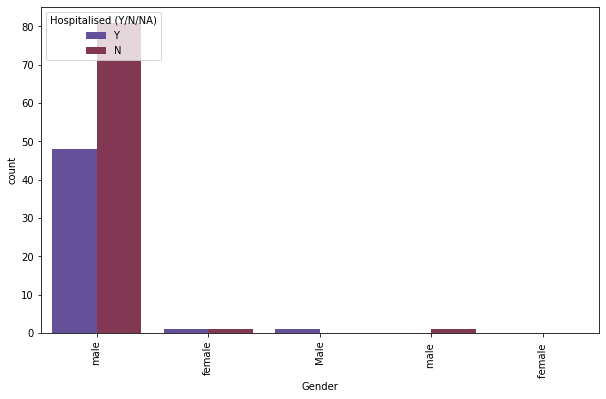

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x="Gender", data=df_2, hue = "Hospitalised (Y/N/NA)",palette="twilight")
plt.xticks(rotation = 90)
plt.show()

<Figure size 720x576 with 0 Axes>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

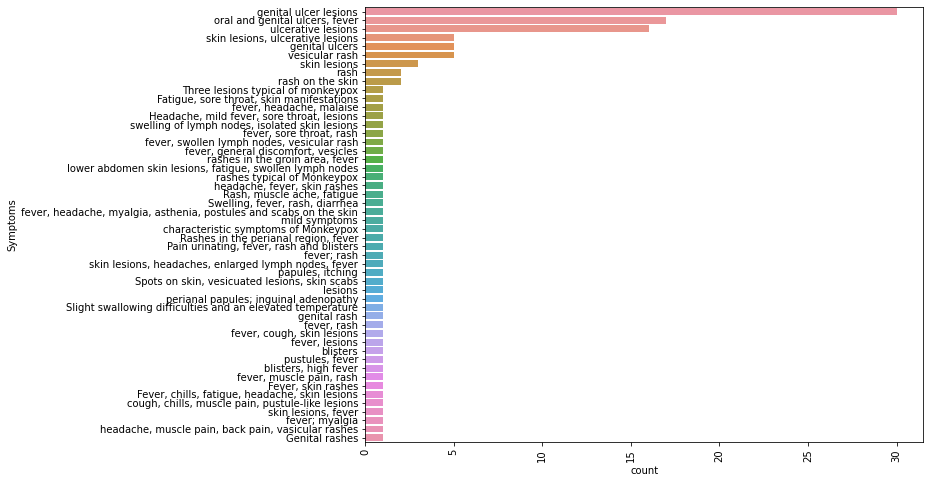

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='Symptoms', data=df_2, order  = df_2['Symptoms'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
ts_data = df_2['Date_confirmation'].value_counts()
ts_data.columns = ['cases']
ts_data.sort_index(inplace=True)
ts_data = pd.DataFrame(ts_data)
ts_data.rename(columns = {'Date_confirmation':'cases'}, inplace = True)
ts_data

,cases
2022-01-31,3
2022-02-19,1
2022-02-28,1
2022-03-31,6
2022-04-10,6
...,...
2022-07-11,677
2022-07-12,828
2022-07-13,360
2022-07-14,601


In [ ]:
fig = px.line(ts_data, x=ts_data.index, y="cases", width=700, color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title="Cases", xaxis_title="Days", yaxis_title="Number of Cases",height=700,width=1200)
fig.show(renderer='colab')

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd3ba1a410>)

Text(0.5, 1.0, '\nCountry-wise Travel History\n')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Cases')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

AttributeError: ignored

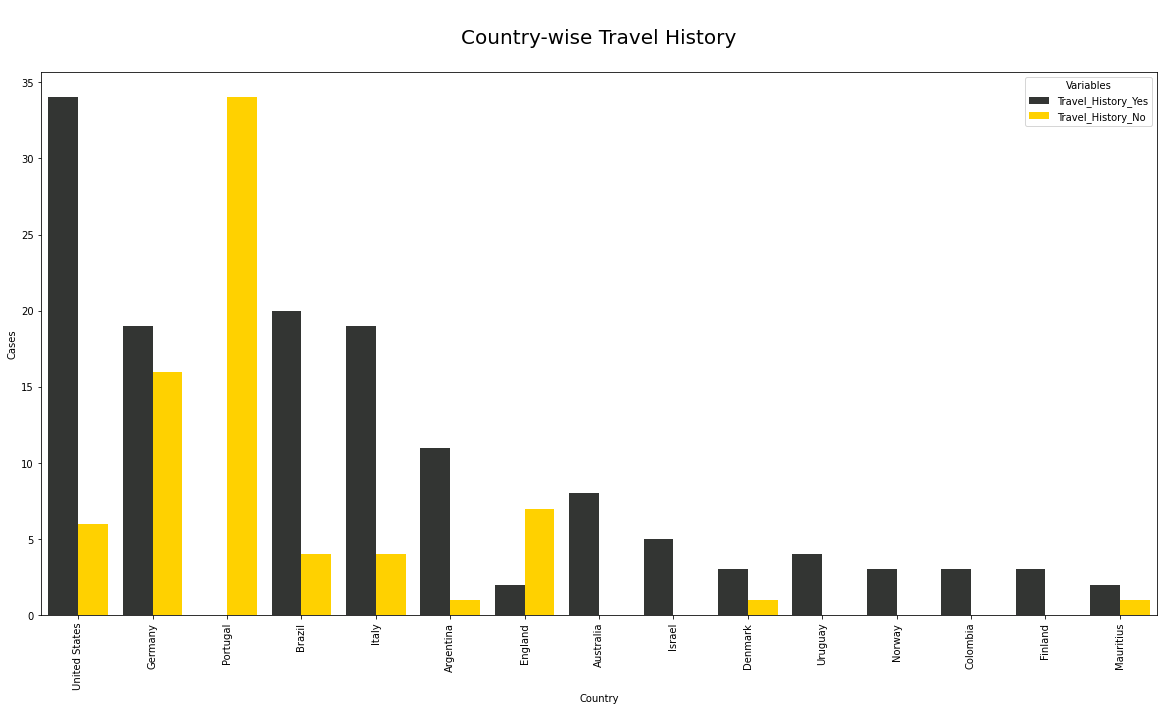

In [ ]:
df_1["Travel_History"] = df_1[["Travel_History_Yes","Travel_History_No"]].sum(axis=1)
case_temp5 = df_1.sort_values(["Travel_History"],ascending=False)[:15]

case_temp5_melt = case_temp5.melt(id_vars=['Country'], value_vars=["Travel_History_Yes","Travel_History_No"],
                  var_name="Variables", value_name="Values")

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp5_melt["Country"],y=case_temp5_melt["Values"],hue=case_temp5_melt["Variables"],palette=["#333533","#ffd100"], saturation=1)
p.axes.set_title("\nCountry-wise Travel History\n",fontsize=20)
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
df_1["Total_Cases"] = df_1[["Confirmed_Cases","Suspected_Cases"]].sum(axis=1)

In [ ]:
palette_cmap = ["#480838","#580838","#600840","#680840","#7e002f","#8c0034","#900C3F","#9D0208","#D00000","#DC2F02","#E85D04","#F48C06","#F5B301","#FFC300","#FED053","#7C7C7C","#3B3F46","#2A2E34","#1E2328"]

sns.palplot(sns.color_palette(palette_cmap))
plt.show()

In [ ]:
plt.subplots(figsize =(10, 8))

sns.heatmap(df_1.drop(columns=["Country","Total_Cases","Travel_History"]).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.95), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Confirmed_Cases',y='Travel_History_Yes',color='r',data=df_1)
plt.title('Confirmed Cases vs Travel History - Yes',size=18)
plt.xlabel('Confirmed Cases',size=14)
plt.ylabel('Travel History - Yes',size=14)
plt.show()

In [ ]:
date = list(df_1[-1:].columns[1:-1])
case = list(df_1[-1:].values[0][1:-1])
mean_case = []
for i in range(1, len(case)+1):
    mean_case.append(sum(case[:i])/i)

fig = px.line()
# fig = px.line(x=date, y=case,name='total case')
fig.add_scatter(x=date, y=case,mode='lines',name='total case')
fig.add_scatter(x=date, y=mean_case,mode='lines',name='mean case')
fig.update_layout(
    title_text='Increase of monkeypox cases',
    xaxis_title="Date",
    yaxis_title="Cases"
)

In [ ]:
def top_plots(col=None):
    data1_sorted=df_1.sort_values(by=col,ascending=False)
    top10 = data1_sorted[:10]
    label_text = ' '.join(col.split('_'))
    fig1=px.bar(x="Country" ,y=col,data_frame=top10,labels=['Country',label_text], color=col,color_continuous_scale='dense',
                 text_auto=True,title=f'Top 10 Countries based on {label_text}')
    fig1.show()

In [ ]:
top_plots(col='Confirmed_Cases')
top_plots(col='Suspected_Cases')
top_plots(col='Hospitalized')